### 周期波形

以 10 kHz 的采样率生成 1.5 秒的 50 Hz 锯齿波。对一个方波进行重复计算。

In [30]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

#### 锯齿波：

C:\USERTEMP\Temp/ipykernel_12944/3831916400.py:24: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  N = np.array(N, dtype=np.int)#Force floating point to integer conversion
C:\USERTEMP\Temp/ipykernel_12944/3831916400.py:25: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release

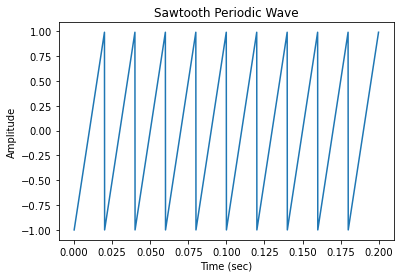

In [8]:
def swatooth_wave(start, end, period, step):

    #:param start: the fist point of the wave
    #:param end:  the last point of the wave
    #:param period:  the number of points in one period of the wave
    #:param step:  the number of points every step has in one period
    #:return: the x array and the y array

    xout = []
    yout = []
    for i in range(start, end, period):
        x = np.arange(i, i + period, step)

        #y = np.where(x >= i, i + period - x, x - i) Output anti aliasing wave
        y = np.where(x >= i, x - i , i + period - x)
        xout = np.append(xout, x)
        yout = np.append(yout, y)
    return xout, yout
#Input known waveform and sampling information
fs = 10000 #sampling frequency
f = 50 #the frequence of signal
N = fs/f # Number of points per cycle
sum_N = 10*N #In the example, only the waveform in the first 0.2 seconds is displayed
N = np.array(N, dtype=np.int)#Force floating point to integer conversion
sum_N = np.array(sum_N, dtype=np.int)

a,b = swatooth_wave(0,sum_N,N,1)
X = a/10000 #Convert the sample point value into time value and function value
Y = b/100-1
#Draw the waveform
plt.title('Sawtooth Periodic Wave')
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.plot(X, Y)
plt.show()

#### 方波：

C:\USERTEMP\Temp/ipykernel_12944/3391122298.py:21: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  N = np.array(N, dtype=np.int)#Force floating point to integer conversion
C:\USERTEMP\Temp/ipykernel_12944/3391122298.py:22: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release

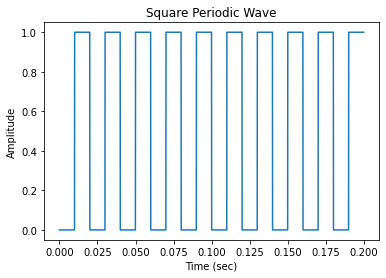

In [9]:
def square_wave(start, end, period, step):
    #:param start: the fist point of the wave
    #:param end:  the last point of the wave
    #:param period:  the number of points in one period of the wave
    #:param step:  the number of points every step has in one period
    #:return: the x array and the y array
    xout = []
    yout = []
    for i in range(start, end, period):
        x = np.arange(i, i + period, step)
        y = np.where(x >= i + period / 2, 1, 0)

        xout = np.append(xout, x)
        yout = np.append(yout, y)
    return xout, yout
#Input known waveform and sampling information
fs = 10000 #sampling frequency
f = 50 #the frequence of signal
N = fs/f # Number of points per cycle
sum_N = 10*N #In the example, only the waveform in the first 0.2 seconds is displayed
N = np.array(N, dtype=np.int)#Force floating point to integer conversion
sum_N = np.array(sum_N, dtype=np.int)

a,b = square_wave(0,sum_N,N,1)
X = a/10000 #Convert the sample point value into time value and function value
Y = b
#Draw the waveform
plt.title('Square Periodic Wave')
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.plot(X, Y)
plt.show()

### 非周期性波形：

生成 2 秒的三角形脉冲，采样率为 10 kHz，宽度为 20 ms。对一个矩形脉冲进行重复计算。

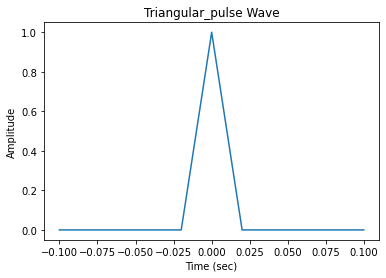

In [10]:
def triangular_pulse(start, end, width, step):
    xout = []
    yout = []
    #for x in range(-width, width, step):
    for x in range(start, end, step):
     if start<x<2*width:
      x = np.arange(start, 2*width, step)
      xout=x
      y = np.where(x >= width, 2*width - x, x)
      yout=y
     else:
      xout = np.append(xout,x)
      yout = np.append(yout,0)
    return xout, yout
#Input known waveform and sampling information
fs = 10000  #sampling frequency
width = 200 #20ms has 200 points
end = 1200 #0.1s has 20000 points,in the example, only the waveform of the first 0.1 second is displayed
start = 0
step = 1
a,b = triangular_pulse(start,end,width,step)
xi = np.arange(-800,0)#Add waveform with negative part
yi = np.zeros(800)
xo = np.append(xi,a)
yo = np.append(yi,b)
x = xo/10000-0.02 #Convert the sample point value into time value and function value
y = yo/200
#Draw the waveform
plt.title('Triangular_pulse Wave')
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.plot(x, y)
plt.show()

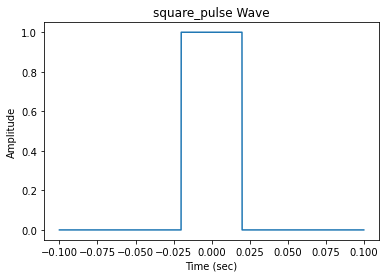

In [5]:
def square_pulse(start, end, width, step):
    xout = []
    yout = []
    #for x in range(-width, width, step):
    for x in range(start, end, step):
     if start<x<width:
      x = np.arange(start, width, step)
      xout=x
      yout= np.ones(width)

     else:
      xout = np.append(xout,x)
      yout = np.append(yout,0)
    return xout, yout
#Input known waveform and sampling information
fs = 10000  #sampling frequency
width = 400 #20ms has 200 points
end = 1200 #0.1s has 20000 points,in the example, only the waveform of the first 0.1 second is displayed
start = 0
step = 1
a,b = square_pulse(start,end,width,step)
xi = np.arange(-800,0)#Add waveform with negative part
yi = np.zeros(800)
xo = np.append(xi,a)
yo = np.append(yi,b)
x = xo/10000-0.02 #Convert the sample point value into time value and function value
y = yo
#Draw the waveform
plt.title('square_pulse Wave')
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.plot(x, y)

gauspuls 函数使用指定时间、中心频率和小数带宽生成高斯调制正弦脉冲。

sinc 函数计算输入向量或矩阵的数学正弦函数。正弦函数是宽度为 2π，高度为单位高度的矩形脉冲的连续傅里叶逆变换。

生成带宽为 60%、采样率为 1 MHz 的 50 kHz 高斯 RF 脉冲。当包络比峰值低 40 dB 时，截断脉冲。

Text(0.5, 1.0, 'Gaussian Pulse')

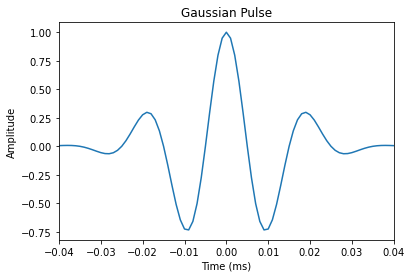

In [34]:
t = np.linspace(-0.04, 0.04, 80000, endpoint=False)
y1 = signal.gausspulse(t, fc=50000, bw=0.6, bwr=- 6, tpr=- 40, retquad=False, retenv=False)
plt.plot(t*1e3,y1)
plt.xlim((-0.04,0.04))
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.title('Gaussian Pulse')

为一个线性间距向量生成正弦函数：

Text(0.5, 1.0, 'Sinc Function')

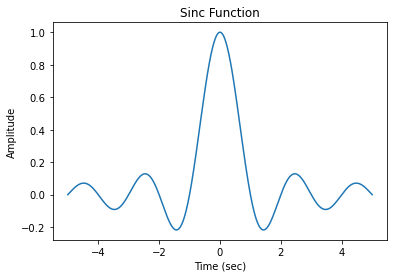

In [35]:
t2 = np.linspace(-5,5,1000)
y2 = np.sinc(t2)
plt.plot(t2,y2)
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.title('Sinc Function')

### 扫频波形

(0.2, 1.8)

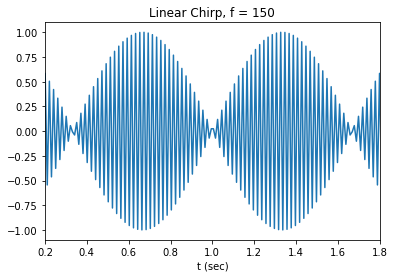

In [40]:
#signal.chirp(t, f0, t1, f1, method='linear', phi=0, vertex_zero=True)
t = np.linspace(0, 2, 200)
ylin = signal.chirp(t, f0=150, t1=2, f1=150, method='linear')
plt.plot(t, ylin)
plt.title("Linear Chirp, f = 150")
plt.xlabel('t (sec)')
plt.xlim((0.2,1.8))

(0.0, 0.01)

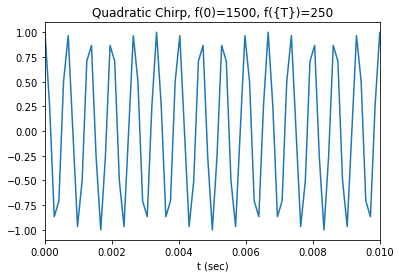

In [49]:
fs = 7200
T = 4
t = np.arange(0, int(T*fs)) / fs
yq = signal.chirp(t, f0=1500, f1=250, t1=T, method='quadratic')
plt.plot( t,yq)
plt.title("Quadratic Chirp, f(0)=1500, f({T})=250")
plt.xlabel('t (sec)')
plt.xlim((0,0.01))